# Applications of Deep Learning in Hydrology: Improving Prediction Accuracy and Revealing Underlying Processes

by **Md Fahim Hasan** <br>
December 09, 2022 <br> 
CS 545

## Introduction

Hydrology is the science of quantifying and understanding the water cycle and how that affects land surface and atmospheric processes. In this crucial crossroad era of climate change, hydrology is one of the principal domains of science that scientists are using to understand climate change impacts. Hydrologic processes are complex and highly data-driven. Due to a shortage of in-situ estimates of hydrologic fluxes (precipitation, evapotranspiration, surface runoff, etc.), scientists are becoming more inclined to satellite-based estimates (commonly known as remote sensing) of these fluxes. Fortunately, advancement in the space era is offering us plenty of datasets, ushering in the age of big data (remote sensing and geospatial datasets) in hydrology.

These advancements have presented some new challenges. Hydrologists (water scientists) generally use process-based (numerical/physical) models to predict water cycle fluxes, such as rainfall intensity, flood level, groundwater level, river discharge, etc. For such models, it is very important to achieve not only high prediction accuracy of these fluxes but also to understand the underlying processes. For example, it is equally important to predict streamflow discharge (flow) during high rainfall events and understand what processes (such as soil moisture condition, groundwater-surface water interaction, etc.) are affecting the flow. Generally, the process-based models offer a good representation of hydrologic processes. But these models do not provide high accuracy in all cases, especially if there is a lack of datasets. Moreover, such models are not equipped to handle big data in most cases. These cases have led to scientists'/hydrologists' interest in using data-driven techniques, such as machine and deep learning (ML/DL).

ML/DL approaches offer excellent prediction accuracy in hydrologic applications, such as predicting stream flow. But they offer minimal (i.e., partial dependence plots) to zero interpretation of underlying processes, therefore, sometimes referred to as black box models. Scientists have been trying to understand what is happening under the hood of these models. In the last few years, there have been efforts to develop/improve ML/DL models that can learn using process-based/physical equations, not only in hydrologic sciences but also in other research domains. Such models are commonly called physics-informed ML/DL. In this project, I will review some recent papers involving such works, along with some papers that apply conventional deep learning models in hydrology. I have chosen five papers for reviewing, which are-

1. Jiang et. al. 2020 - a physics informed RNN model
2. Lee et al. 2021 - physical interpretation of internal processes of a LSTM model 
3. Solgi et al. 2021 - a LSTM-NN model
4. Tsai et al. 2021 - a physics informed NN model
5. Feng et al. 2022 - a physics informed NN model

Except Solgi et al. (2021), which uses a NN integrated LSTM architecture, the papers offer different neural network frameworks reinforced by physical equations/hydrologic models. In the following sections, I will discuss what these papers offer, why it is important from the authors' perspective, the models' architecture, and the future needs in this research domain.


## Methods

### 1. Jiang et al. (2020): Improving AI System Awareness of Geoscience Knowledge: Symbiotic Integration of Physical Approaches and Deep Learning

#### Motivation

Jiang et al. (2020) developed an AI system that is integrated with the physical rules of hydrologic processes. Previous studies (Dwelle et al., 2019; Mo et al.,2019) have tried integrating hydrologic and ML/DL models, where separate models have been developed and outputs have been compared to communicate information between the separate models to generate the final results. But these models did not have a hydrologic process directly built in.

Physical processes can be integrated into neural networks in 2 ways-
1) Modifying the loss function with physical conditions <br>
2) Wrapping analytical solutions of physical processes in Neural Networks

But Jiang et al. (2020) argue that this is not enough. Physical processes are complex and can be represented as Differential Equation (DE) forms. Analytical solutions cannot solve DE forms; therefore, the NN model wrapped with analytical solutions can not properly propagate physical processes through the neural network layers. Jiang et al. suggest a NN architecture where physical processes are passed into a Recurrent Neural Network (RNN) layer in the form of ODE. The research paper names it P-RNN. The P-RNN model framework is discussed in the following section. The model is used to predict runoff (water that flows over land surface/streams).

#### Model Architecture 

The model used by Jiang et al. (2020) has two main pipelines. The first one, referred to as the main pipeline, has the input forcing variables (precipitation, temperature) which are fed to a physics-wrapped RNN. Here, the physics wrapping means introducing hydrologic equations from a hydrologic model to the RNN layer. The second pipeline, referred to as the parameterization pipeline, has soil properties and topographic attributes fed into multiple NN layers. The soil properties passed through NN layers are used to represent physical properties ($θ_N$) that are fed into the P-RNN layer. Topographic attributes are used to create weights and biases, represented by $θ_P$. $θ_P$ helps the model identify regional properties so that the model can be applied to any region. $θ_P$ parameter is passed into a block of convolutional layers. The convolutional layers supplement the original output (runoff/streamflow) generated by the P-RNN layer. The convolutional layers are specifically included to add the time lag influence of solar radiation and vapor pressure, which could not be propagated by the physical equations of the P-RNN layer. The diagram (simplified from Jiang et al. (2020)) represents the model structure used in the paper.

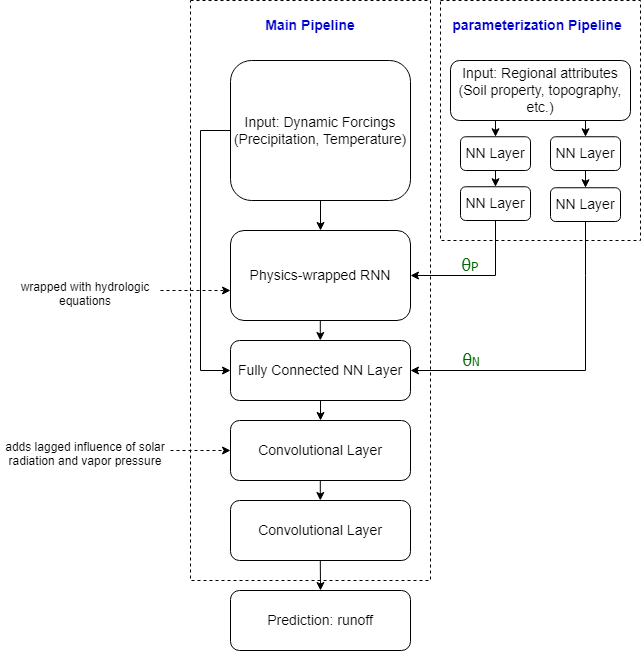


_Figure: Simplified Model Architecture Used in Jiang et al. (2020)._

#### Strenghts and Limitations

The model offers a robust approach to integrating NN with traditional hydrologic models, paving pathways for future works on physics-informed hydrologic models. The model also has the potential to be transferred to other regions with slight modifications in input variables. One limitation of the method is the additional convolutional layer required for post-processing the original output from the RNN layer. It indicates some weaknesses in the model architecture, which has the scope for improvement in future studies.

### 2. Lees et al. (2021): Hydrological Concept Formation Inside Long Short-Term Memory (LSTM) Networks

#### Motavation

In recent days, data-driven hydrologic models, such as DL models, have been increasingly used for hydrologic forecasting. Such applications offer very good accuracy, but the backend hydrologic processes that lead to the predictions are of great mystery. For many applications, understanding the internal hydrologic processes are more important than the prediction itself. Recently, LSTM models have become very popular for hydrologic flux prediction but possess interpretability issues. This research involves how LSTM tensors can be interpreted to understand the relations between hydrologic processes. Using a simple regression approach, the authors investigate if the cell state vectors (LSTM memory) can be used to interpret a variable that is neither in the input dataset nor in the target variable. For example, using the regression approach, cell state vectors from a trained LSTM model that predicts discharge (Streamflow) were used to simulate soil moisture and snow cover that were not part of the original LSTM model.

#### Model Architecture

In LSTM model, cell state is represented as follows-

$$
C_t, h_t = f_{LSTM}(x_t, c_{t-1}, h_{t-1}, θ_k)
$$

$$
Y_t = f_{Dense}(h_t, θ_t)
$$

where,<br>
$C_t$ = cell state <br>
$h_t$ = hidden state <br>
$x_t$ = metereological feature (forcings) and spatial attributes <br>
$c_{t-1}$ = cell step from previous time step <br>
$h_{t-1}$ = hidden step from previous time step <br>
$θ_k, θ_t$ = model learnable parameters <br>
$Y_t$ = Output (discharge here)<br>


In Lees et al. (2021), the authors used a simple LSTm model with meteorological and spatial attributes as input and predicted discharge as output. The authors designed a simple probe which is essentially a regression model, to investigate the model's underlying dynamics.

After training the model, the cell state vectors are extracted for each timestep. Cell state vectors are considered long-term memory of the LSTM, which carries decision-making information, including the timestamps. The cell state vectors are then used as inputs, and the variable to investigate (e.g., soil moisture, snow cover) as the target variable. This input dataset is then passed through the regression probe to predict the target variable. A simplified diagram of this study's approach is provided below. Finally, the study compares the result from the regression probe with observed soil moisture or snow cover data to see if the cell-state vectors can be used to predict these unseen variables. If the result is satisfactory, that will justify their claim that the LSTM model understands the internal hydrologic processes; therefore, its cell vector can be used to predict unseen variables.

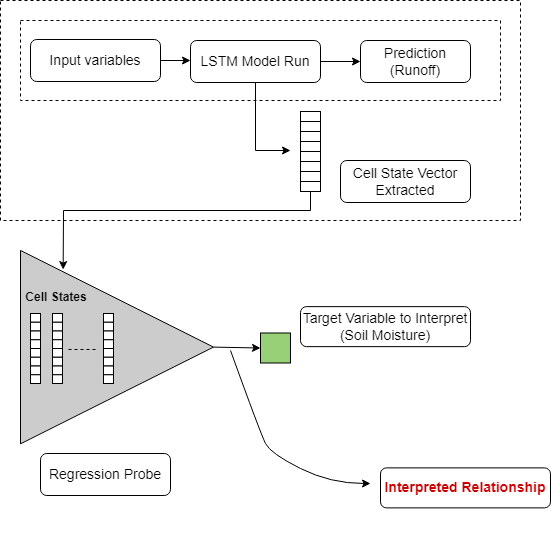


_Figisue: Simplied Workflow of Lee et al. (2021)._

#### Strenghts and Limitations

The study suggests a novel approach where the LSTM internal processes (cell vectors) will be used to investigate variables that are not part of the original LSTM model. In that sense, this approach can be used to interpret how physical processes are connected to model outcomes, e.g., how soil moisture is connected to discharge (runoff). However, the author did not suggest an approach by which cell state vectors can be directly interpreted with the original model output discharge; therefore, this study does not offer a way to interpret the black box LSTM model. Nevertheless, it is a fascinating approach and can be used for practical applications, such as using a trained DL (LSTM or other) model to predict other hydrologic fluxes.

### 3. Solgi et al. (2021): Long short-term memory neural network (LSTM-NN) for aquifer level time series forecasting using in-situ piezometric observations

#### Motavation

The motivation of Solgi et al. (2021) comes from the unavailability/shortage of input datasets required for both processed-based and neural network models. Both of these techniques need large input datasets and training data. For example, many studies (Zhang et al. 2018, Bowes et al. 2018) have used meteorological inputs and spatial attributes to make neural network based hydrologic models. Solgi et al. show that it is possible to create models even with minimal data. It develops an LSTM model that only uses historical groundwater level records from some stations to predict groundwater levels at other/surrounding locations. That means only one dataset was used as input data, and the same data was predicted. This technique has the potential to fill the data gap at spatial and temporal scales for locations/time where there are no available records. Additionally, with avaiable past records it also the the potential to forecast future groundwater level.

#### Model Architecture

Solgi et al. (2021) chose a traditional LSTM architecture for their model. The LSTM has one input cell, a hidden layer that consists of 10 LSTM cells, and one output cell with the identity activation function. The model only uses one input cell because there is only one type of input data. The one input cell receives the time-lagged groundwater level data in sequence. Instead of sending the output of LSTM cells to the output cell after the first input, each output is sent to the next LSTM layers along with the next input sequence. This process continues until the model receives the final input sequence. Finally, the final outputs are sent to the output cell when all inputs are received and passed through LSTM cells. The model uses one output cell because one lag groundwater level is forecasted. The model uses Adam optimizer for training. The following figure shows the generic model structure Solgi et al. used.

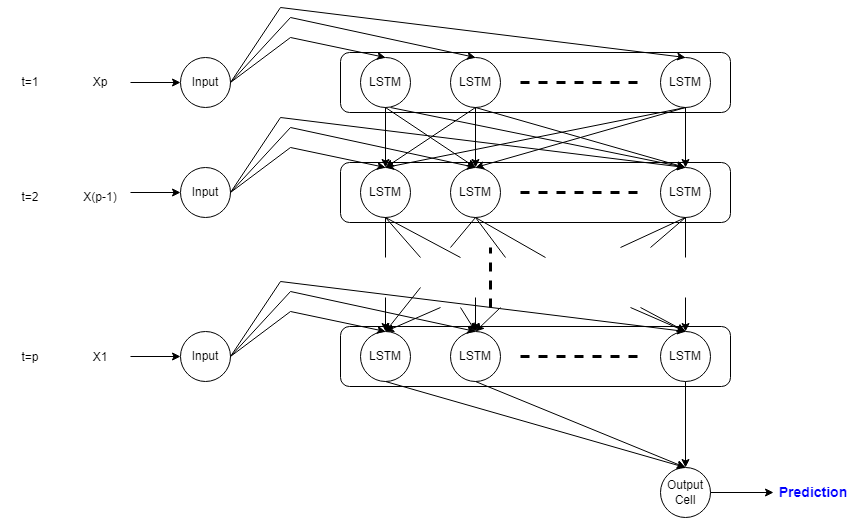

_Figure: LSTM Model Structure Used by Solgi et al. (2021)._

#### Strenghts and Limitations

The current neural networks and processed-based models are data intensive. Solgi et al. (2021) present a way to create a neural network model with only one type of data, which is certainly an excellent approach. Unfortunately, such a method cannot be applied in regions with data scarcity, especially temporal lag in existing records. Additionally, like the traditional LSTM model, this approach is black-box and offers no interpretability.

### 4. Tsai et al. (2021): From Calibration to Parameter Learning: Harnessing the Scaling Effects of Big Data in Geoscientific Modeling

#### Motivation

Tsai et al. (2021) explore a deep learning approach to find calibration parameters used to calibrate hydrologic models. Calibration parameters are unobserved (non-existent in the real world), and the only purpose of these parameters is to bring the output of a hydrologic model closer to the observed data. Traditional hydrologic models use cumbersome calibration approaches and create non-unique (equifinal) models with the same results but different internal processes. Such equifinality hampers one of the traditional purposes of hydrologic models, i.e., understanding physical processes happening behind.
Tsai et al. (2021) propose a DL-based parameter calibration approach that solves the calibration parameters needed for the hydrologic model. A single hydrologic model with a set of parameters received from the DL helps better to understand the background processes compared to traditionally calibrated equifinal models, which can have multiple sets of parameters predicting the same result. Moreover, calibration of the hydrologic model in the traditional approach is generally location-specific, meaning a model calibrated for a region cannot be used for other regions. This happens because the traditional calibration approach tries numerous set of parameters to find the best solution (actually overfits for that particular dataset) but do not learn anything from the parameters. On the other hand, a DL can learn from the input variables and keep that learning saved in its parameters. This makes DL based calibration method transferrable to other regions.

#### Model Architecture

Tsai et al. (2021) use a hydrologic model as the backbone of the proposed deep learning model structure. The hydrologic model is given with the dynamic meteorological inputs. An LSTM model ($g_A$) is initiated at the same time, which uses the dynamic inputs, static variables (topography, soil texture, land cover, geology, etc.), and historical data (observed attribute and their result). The LSTM generates a set of parameters that are fed into as calibration parameters in the hydrologic model. The hydrologic model, supplemented by the calibrated parameters from the LSTM, provides an output that is used to calculate the loss. The loss is then backpropagated to the LSTM so that it can update its parameters. It might take many epochs to get a final result from the LSTM-hydrologic combined model. Still, it will be significantly more time-efficient than the traditional model calibration approach. The simplified model architecture is provided in the following figure. Here, the model can predict different (user-specified) hydrologic fluxes, e.g., Evapotranspiration (ET), Soil Moisture. This is a significant improvement over the previous studies discussed here, which could only a single variable runoff/streamflow. 

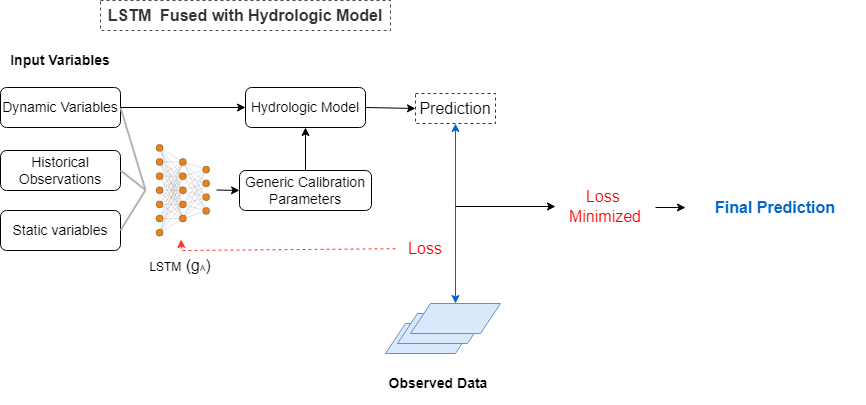

_Figure: Simplified Model Diagram Used in Tsai et al. (2021)_

#### Strenghts and Limitations

The proposed hybrid model significantly improves the model calibration technique of the hydrologic model in terms of time and model equifinality. This approach is also transferrable to different regions compared to the conventionally calibrated hydrologic models. Still, this approach is not fully free from the limitations of the hydrologic model itself. The hydrologic model used in this approach uses many simplified equations and assumptions, like many other models, that cannot accurately portray the hydrologic processes, leading to inaccurate output. This uncertainty will be propagated to the final model outcome even after being supplemented by parameters from the LSTM model.

### 5. Feng et al. (2022): Differentiable, Learnable, Regionalized Process-Based Models With Multiphysical Outputs can Approach State-of-the-Art Hydrologic Prediction Accuracy

#### Motivation

Feng et al. (2022)'s recent work with a physics-informed LSTM model is an improvement over the previous studies discussed in this project. Tsai et al. (2021) reported the model equifinality issue (model prediction is accurate but physical representation is distorted due to calibration with a single variable). Lees et al. (2021) offered an approach to represent model physics, which does not guarantee physical interpretation according to other studies. Jiang et al. (2020) offered the P-RNN model, which also needed additional convolutional layers to improve results. 

Feng et al. (2022) recognized these limitations and proposed an improved model structure that integrated physical rules and neural networks. This is an improvement over their previous work Tsai et al. (2021). As discussed in Jiang et al. (2020) section, physical equations can be integrated as differential equations into neural networks. Feng et al. followed the same principle, naming it `Differential Programming (dPL)`, and improved the model architecture. In this architecture, the dpL backpropagates gradients from outputs of the process-based (hydrologic) model and adjusts network (LSTM) parameters (weights) to calibrate the hydrologic model's parameters. Thus, the hydrologic and the LSTM models run in parallel while supplementing each other. The model is used to predict runoff (water that flows over land surface/streams).

#### Model Architecture

Feng et al. (2022) offered the following the simplified representation of their model.

$$
θ = g_{A}(A, x)
$$

where, <br> 
θ = Paremeters of the hydrologic model <br>
A = static attributes (topography, soil texture, land cover, geology, etc.) <br>
x = dynamic attributes (meterogical forcings, such as precepitation, temperature) <br>
$g_A$ = LSTM model<br>


Here, the LSTM model ($g_A$) takes static and dynamic attributes and provides the physical parameters for the process-based hydrologic model. During the forward run, there is no feedback between the LSTM and the hydrologic models. Once the hydrologic model gives output, loss calculation is performed using the observed (training) data. Then, the gradients are backpropagated to the LSTM. The weights of the LSTM are updated based on these gradients, and updated parameters are provided to the hydrologic model in the next epoch. 

One key feature of this hybrid model is that certain parts of the hydrologic model are replaced by neural networks (this is an improved approach from the previous work Tsai et al. (2021)). This is done to improve some uncertainties of a hydrologic model relating to assumptions and simplified process representation (to avoid complexity). Due to these limitations, even if the LSTM gives updated parameters to the hydrologic model, part of the hydrologic model (here, the effective rainfall estimation part) can generate unreliable flux estimates. To overcome such limitations, some processes of the hydrologic model are replaced by neural networks to improve flux estimation. The simplified model diagram from Feng et al. (2022) is presented below.  

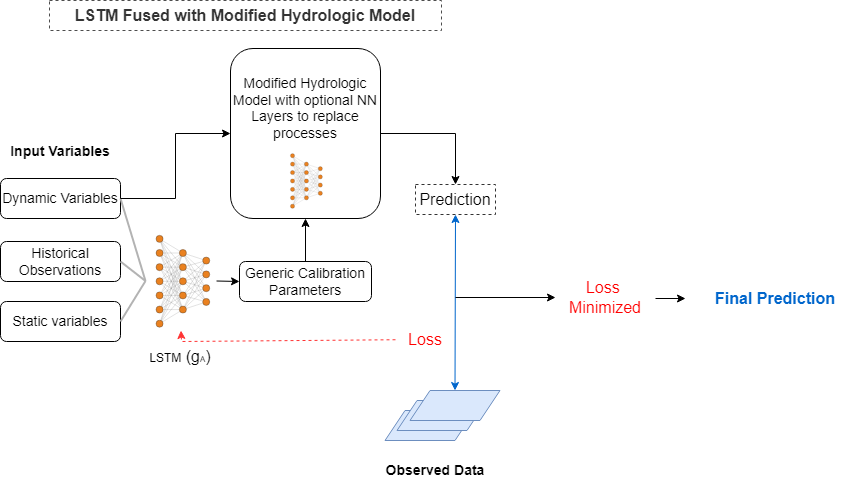

_Figure: Simplified Model Architure of Feng et al. (2022)._

#### Strengths and Limitations

Integrating NN to replace the processes of the hydrologic model is very novel and fascinating. It will be able to remove the uncertainty related to hydrologic model assumptions and simplification. Nevertheless, the hydrologic model still has many parts which run independently of the neural networks based on assumed parameters and simplified processes. Moreover, the study did not fully address how integrating DL (LSTM) with a hydrologic model improves the interpretability of deep learning methods for hydrologic applications. The authors mention that it is easily doable (I agree, the hydrologic model has records of each process, which can be interpreted to represent the physics behind it) but did not mention how.

## Results

The studies employed various metrics to compare their model outcome with observed data. All of the studies have reported positive results. This is a good sign for researchers in various fields trying to develop physics-informed deep learning methods. The results are discussed in the following-

**Jiang et al. (2020):**
The performance of the hybrid RNN-hydrologic model developed by Jiang et al. was tested with the stand-alone hydrologic model, simple NN model, and LSTM model, all of which were at the scale of the contiguous United States. The model predictions (runoff) were compared to observed runoff values available at different monitoring stations, and the results were interpreted using `The nash-Sutcliffe efficiency (NSE)` coefficient. In terms of NSE, the new hybrid RNN-hydrologic performs significantly better in predicting runoff than the other models. The hydrologic model from the RNN-hydrologic model was also used to generate the flux estimate of `"water storage in snowpack"` and compared it to available `Snow Water Equivalent` estimates which concluded a satisfactory result as well.  

**Lees et al. (2021):**
Lees et al. reported the performance of their regression probe. The probe was designed to predict a new target variable (e.g., soil moisture), which is connected to the hydrologic process but was not part of the initial model, using the cell state vectors from an LSTM model, thus interpreting the model. In my opinion, that is not a suitable approach to incorporate interpretability because it does not directly connect the model input variables to the original target variable (here, runoff) of the model. However, the regression probe was used to predict soil moisture, and the results were compared with available soil moisture data. The plots of predicted soil moisture vs. observed soil moisture show that the probe was able to capture the temporal dynamics of soil moisture in most cases. But there is a systematic bias between prediction and observed data which sometimes leads to high error. Overall, Lees et al. introduced a new approach to making the LSTM model interpretable, but the results did not look very satisfactory to me.

**Solgi et al. (2021):**
Solgi et al. measure model performance on a test dataset by comparing model predicted groundwater level data with observed groundwater level data for multiple locations. In general, the result shows good $R^2$ performance for all comparisons.

**Tsai et al. (2021):**
Tsai et al. used root-mean-square error (RMSE) as the objective function of the hybrid LSTM model. The model predicted evapotranspiration as output, and RMSE between the predicted variable (ET) and observed ET data was calculated to determine model performance. Results show that model performance increase when more training data is incorporated. Additionally, the model was used to simulate soil moisture which was compared with satellite soil moisture data. This comparison also showed good performance.


**Feng et al. (2022):**
Feng et al. used a modified RMSE function as the model objective function to account for low streamflow conditions. The model was simulated to predict streamflow. Predicted streamflow was compared to observed streamflow at multiple sites. In general, this hybrid LSTM model showed improved performance (better NSE) than the conventional LSTM model. Additionally, the model was used to simulate ET, and the result was compared with observed ET data, which resulted in satisfactory $R^2$.

## Conclusions

All the studies showed excellent potential in using neural network models to predict hydrologic fluxes. Some of them, Jian et al. (2020), Tsai et al. (2021), and Feng et al. (2022), have shown excellent progress in integrating physics-based models with neural network models like RNN and LSTM. Neural network approaches have high potential in the field of hydrology because of the availability of new earth observation datasets. Moreover, with climate change and extreme climate, the earth science community needs better models that can provide improved forecasts. At the same time, they need to understand the background hydrologic processes. Neural network models integrated with process-based hydrologic models have a high potential for serving these purposes. Nevertheless, the existing hydrological models have their own drawbacks and uncertainties that can propagate to the neural network models. New approaches must be explored to overcome these uncertainties and to develop neural network models that can explain hydrologic processes without relying on traditional hydrologic models. 

### References

* Bowes, B. D., Sadler, J. M., Morsy, M. M., Behl, M., & Goodall, J. L. (2019). Forecasting groundwater table in a flood prone coastal city with long short-term memory and recurrent neural networks. Water, 11(5), 1098.

* Dwelle, M. C., Kim, J., Sargsyan, K., & Ivanov, V. Y. (2019). Streamflow, stomata, and soil pits: Sources of inference for complex models with fast, robust uncertainty quantification. Advances in Water Resources, 125, 13-31.

* Feng, D., Liu, J., Lawson, K., & Shen, C. (2022). Differentiable, Learnable, Regionalized Process‐Based Models With Multiphysical Outputs can Approach State‐Of‐The‐Art Hydrologic Prediction Accuracy. Water Resources Research, 58(10), e2022WR032404.

* Jiang, S., Zheng, Y., & Solomatine, D. (2020). Improving AI system awareness of geoscience knowledge: Symbiotic integration of physical approaches and deep learning. Geophysical Research Letters, 47(13), e2020GL088229.

* Mo, S., Zhu, Y., Zabaras, N., Shi, X., & Wu, J. (2019). Deep convolutional encoder‐decoder networks for uncertainty quantification of dynamic multiphase flow in heterogeneous media. Water Resources Research, 55(1), 703-728.

* Solgi, R., Loáiciga, H. A., & Kram, M. (2021). Long short-term memory neural network (LSTM-NN) for aquifer level time series forecasting using in-situ piezometric observations. Journal of Hydrology, 601, 126800.

* Tsai, W. P., Feng, D., Pan, M., Beck, H., Lawson, K., Yang, Y., ... & Shen, C. (2021). From calibration to parameter learning: Harnessing the scaling effects of big data in geoscientific modeling. Nature communications, 12(1), 1-13.

* Lees, T., Reece, S., Kratzert, F., Klotz, D., Gauch, M., De Bruijn, J., ... & Dadson, S. J. (2022). Hydrological concept formation inside long short-term memory (LSTM) networks. Hydrology and Earth System Sciences, 26(12), 3079-3101.

* Zhang, Jianfeng, et al. "Developing a Long Short-Term Memory (LSTM) based model for predicting water table depth in agricultural areas." Journal of hydrology 561 (2018): 918-929.

### Word Count

In [8]:
import io
import nbformat
import glob
nbfile = glob.glob('Md Fahim Hasan - Term Project Report.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Md Fahim Hasan - Term Project Report.ipynb is 4095
